In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots show up in the notebook
%matplotlib inline


In [2]:
# Path to your data file
file_path = "C:\\Users\\giova\\Desktop\\Online_retail_Project\\Data\\raw\\Online Retail.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Quick peek at the data
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(5268)

In [7]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df[(df["Quantity"] <= 0)| (df['UnitPrice']<= 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [9]:
# create a copy to work with
df_clean = df.copy()

# Remove rows with blank or no customerID ( Anonymous purchases)
df_clean = df_clean[df_clean['CustomerID'].notnull()]

# Remove negative or zero Quantity and UnitPrice
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

In [10]:
# Revenue (Sales amount per line item)
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Convert InvoiceDate to dateTime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Extract date parts
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

In [11]:
df_clean = df_clean.drop_duplicates()


In [12]:
df_clean.shape




(392692, 13)

In [13]:
top_products = df_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64

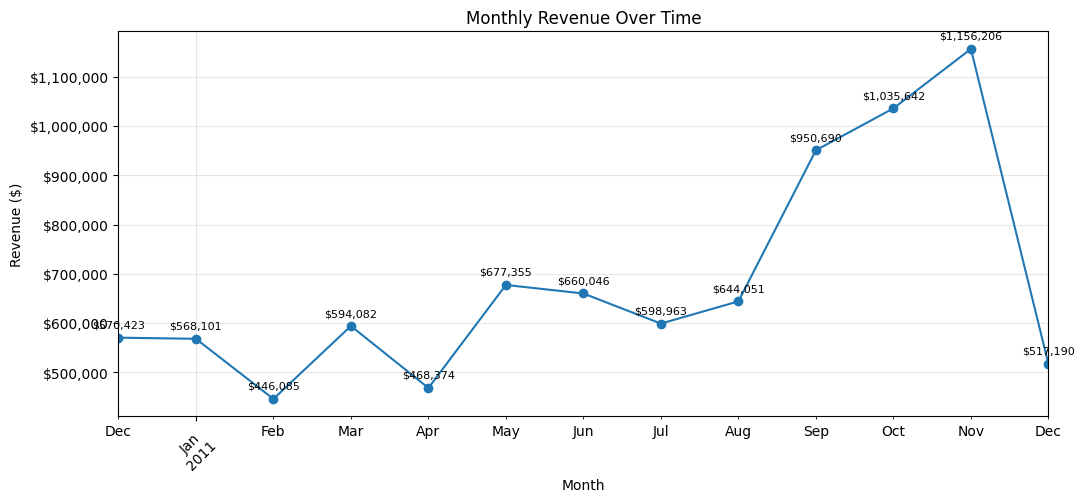

In [14]:
import matplotlib.ticker as mticker

monthly_sales = df_clean.groupby('InvoiceMonth')['Revenue'].sum()



plt.figure(figsize=(12,5))
ax = monthly_sales.plot(marker='o')
plt.title('Monthly Revenue Over Time')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Currency formatting
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Add labels on each data point
for x, y in zip(monthly_sales.index.to_timestamp(), monthly_sales.values):
    plt.text(x, y+20000, f'${y:,.0f}', fontsize=8, ha='center')

plt.grid(alpha=0.3)
plt.show()



In [15]:
top_customers = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: Revenue, dtype: float64

In [16]:
country_sales = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_sales.head(10)


Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64

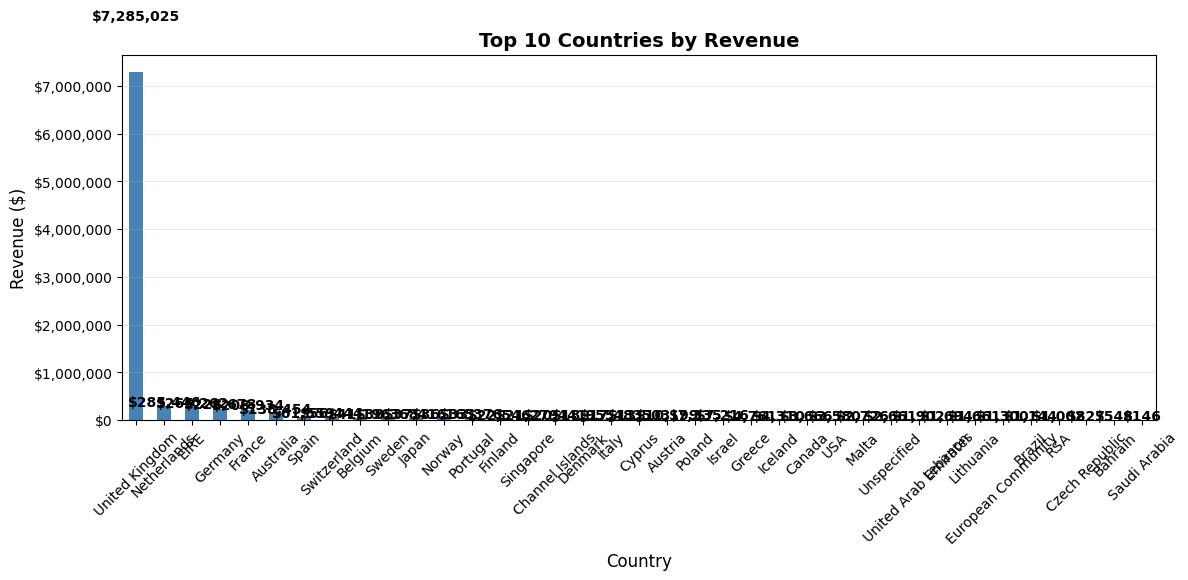

In [17]:
import matplotlib.ticker as mticker

values = country_sales.values

plt.figure(figsize=(12,6))
ax = country_sales.plot(kind='bar', color='steelblue')

plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Currency formatting
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Add labels with scaling based on bar height
for i, v in enumerate(values):
    offset = v * (0.05 if v < max(values) else 0.15)  
    plt.text(i, v + offset, f'${v:,.0f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()




In [18]:
import os
os.makedirs('../data/clean', exist_ok=True)
df_clean.to_csv('../data/clean/online_retail_clean.csv', index=False)
